In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', 100000)

In [35]:
df = pd.read_csv("data.csv")

In [36]:
df.sample(5)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
359,Brazil,2008,Developing,73.4,158.0,61,7.21,526.378064,96.0,0,...,99.0,8.24,99.0,0.1,8787.613750,19297929.0,3.0,3.0,0.704,13.3
21,Albania,2010,Developing,76.2,91.0,1,5.28,41.822757,99.0,10,...,99.0,5.34,99.0,0.1,494.358832,291321.0,1.4,1.5,0.725,12.5
421,Burundi,2010,Developing,56.8,33.0,23,4.16,31.141876,96.0,495,...,94.0,8.82,96.0,1.9,231.194326,876693.0,7.7,7.7,0.361,9.3
1341,Jordan,2004,Developing,72.5,125.0,4,0.54,32.525236,95.0,21,...,95.0,9.50,95.0,0.1,261.456882,5535595.0,3.9,3.8,0.723,13.5
2455,Sri Lanka,2001,Developing,72.7,16.0,5,1.68,53.612786,NaN,309,...,98.0,3.81,98.0,0.1,837.699787,18797.0,15.4,15.6,0.686,12.5


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
Country                            2938 non-null object
Year                               2938 non-null int64
Status                             2938 non-null object
Life expectancy                    2928 non-null float64
Adult Mortality                    2928 non-null float64
infant deaths                      2938 non-null int64
Alcohol                            2744 non-null float64
percentage expenditure             2938 non-null float64
Hepatitis B                        2385 non-null float64
Measles                            2938 non-null int64
 BMI                               2904 non-null float64
under-five deaths                  2938 non-null int64
Polio                              2919 non-null float64
Total expenditure                  2712 non-null float64
Diphtheria                         2919 non-null float64
 HIV/AIDS                          2938 non-null

In [38]:
# making all the columns 

df.columns = df.columns.str.strip()
df.columns = df.columns.str.lower()

In [39]:
def cat_num_lists(df):
    
    cat_list = []
    num_list = []
    
    for col in df.columns:
        
        if df[col].dtypes == object:
            cat_list.append(col)
            
        else:
            num_list.append(col)
    return(cat_list, num_list)

In [40]:
cat_list, num_list = cat_num_lists(df)

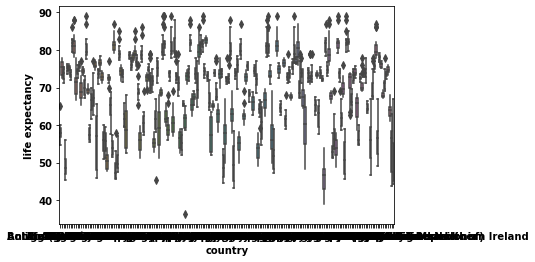

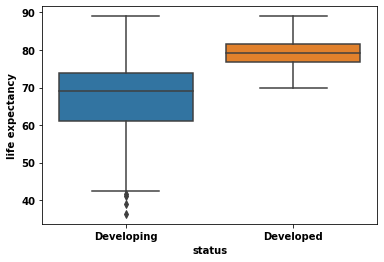

In [41]:
for col in cat_list:

    sns.boxplot(x = col, y = "life expectancy", data = df)
    plt.show()

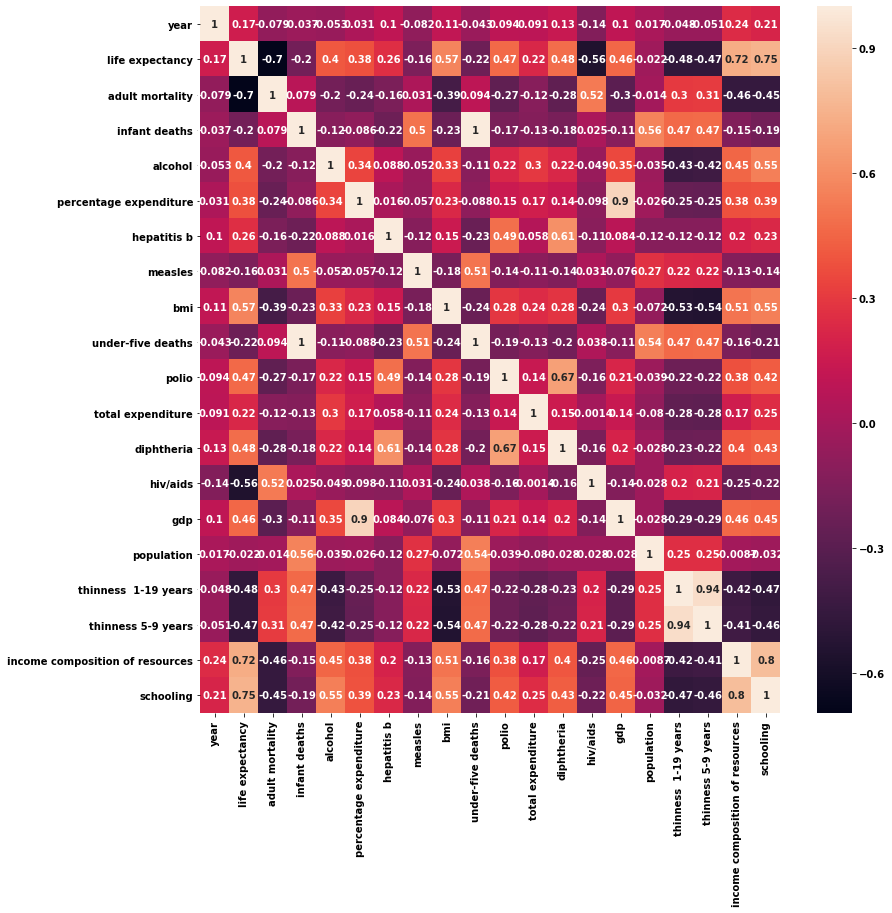

In [42]:
plt.figure(figsize = (13, 13))
sns.heatmap(df[num_list].corr(), annot = True)


===========================country=============================

United Republic of Tanzania                             16
Algeria                                                 16
Sudan                                                   16
Canada                                                  16
Finland                                                 16
Hungary                                                 16
Cyprus                                                  16
Fiji                                                    16
Myanmar                                                 16
Central African Republic                                16
Spain                                                   16
Armenia                                                 16
Zambia                                                  16
Ireland                                                 16
Cuba                                                    16
Sweden                                           

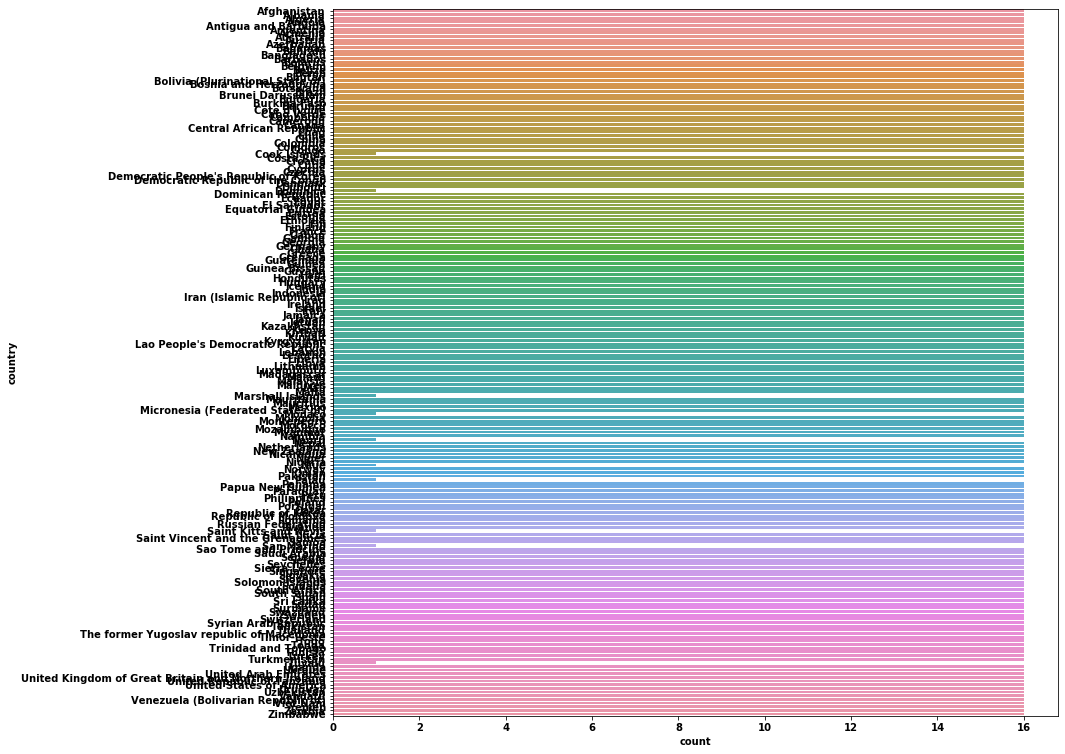


===========================status=============================

Developing    2426
Developed      512
Name: status, dtype: int64


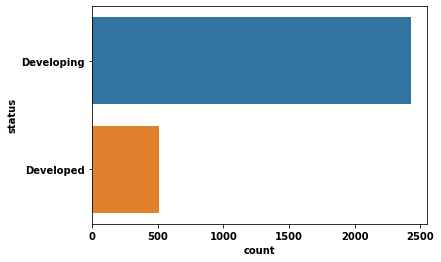

In [43]:
plt.figure(figsize = (13,13))
for col in cat_list:
    
    print("\n==========================={}=============================\n".format(col))
    
    print(df[col].value_counts())
    
    sns.countplot(y = df[col])
    
    plt.show()
    
    

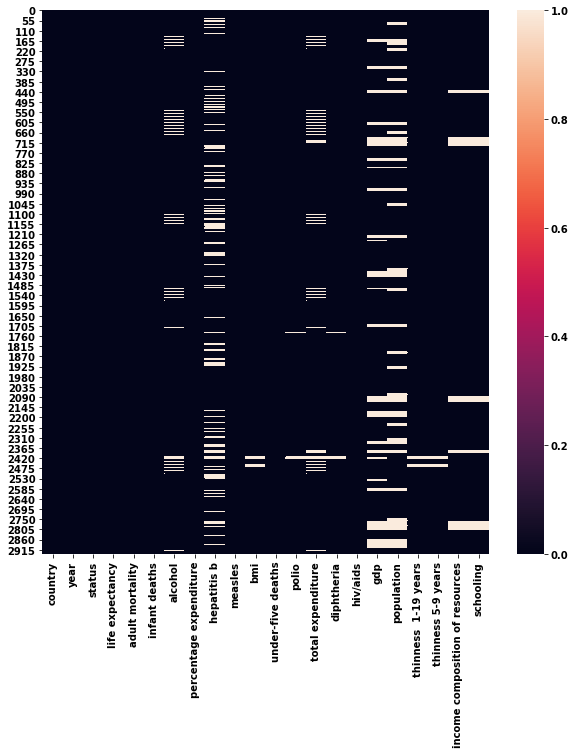

In [46]:
plt.figure(figsize = (10,10))
sns.heatmap(df.isna())

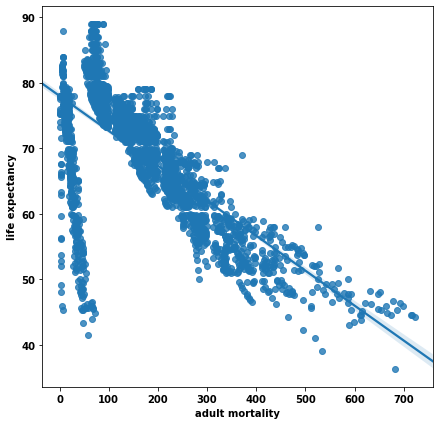

In [47]:
plt.figure(figsize = (7,7))
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
ax = sns.regplot(x="adult mortality", y="life expectancy", data = df)

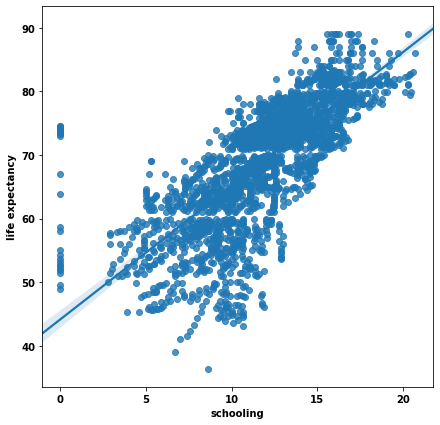

In [48]:
plt.figure(figsize = (7,7))
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
ax = sns.regplot(x="schooling", y="life expectancy", data = df)

In [15]:
g = sns.pairplot(df[num_list], kind="reg")

C:\Users\ranji\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\ranji\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


KeyboardInterrupt: 

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x0000023CD49F3558> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x0000023CD4AD0948> (for post_execute):


KeyboardInterrupt: 

In [49]:
def fill_missing_values(num_list, cat_list, df):
    
    for col in num_list:
        df[col] = df[col].fillna(df[col].mean())
    
    for col in cat_list:
        df[col] = df[col].fillna(df[col].value_counts().index[0])
    
    return df
        
        

In [50]:
df = fill_missing_values(num_list, cat_list, df)

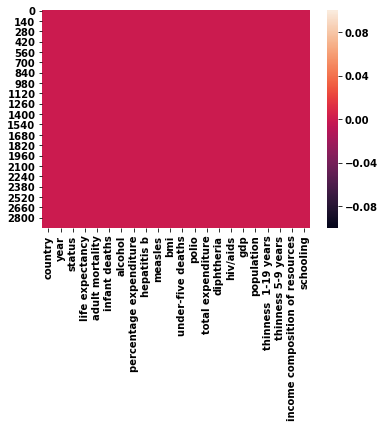

In [51]:
sns.heatmap(df.isna())

In [20]:
corr_df = df.corr()['life expectancy'].abs().sort_values(ascending = False).reset_index()

In [52]:
corr_df

,index,life expectancy
0,life expectancy,1.000000
1,schooling,0.715066
2,adult mortality,0.696359
3,income composition of resources,0.692483
4,bmi,0.559255
5,hiv/aids,0.556457
6,diphtheria,0.475418
7,thinness 1-19 years,0.472162
8,thinness 5-9 years,0.466629
9,polio,0.461574


In [53]:
high_correlation_features = list(corr_df["index"][ corr_df['life expectancy'] > 0.5])

In [54]:
high_correlation_features.remove('life expectancy')

In [55]:
high_correlation_features

['schooling',
 'adult mortality',
 'income composition of resources',
 'bmi',
 'hiv/aids']

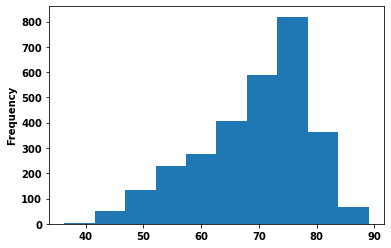

In [56]:
df["life expectancy"].plot.hist()

In [57]:
## creates dummy variables for categorical columns and returns new data frame
def one_hot_encoding(df, cat_col):
    
    print("The shape of df before one hot encoding is ", df.shape)
    dummy_df = pd.get_dummies(df[cat_col])
    
    print(cat_col)
    
    df = pd.concat([df, dummy_df], axis = 1)
    df = df.drop(cat_col, axis = 1)
    print("The shape of df after one hot encoding is ", df.shape)
   
    return df
    
encoded_df = one_hot_encoding(df, ['status'])   

The shape of df before one hot encoding is  (2938, 22)
['status']
The shape of df after one hot encoding is  (2938, 23)


In [128]:
encoded_df_normal = encoded_df
encoded_df_corr = encoded_df[high_correlation_features + ["life expectancy"]]

In [61]:
from sklearn.model_selection import train_test_split

def test_train_split(df, ratio, dep_var):
    
    X = df.drop([dep_var], axis = 1).values
    y = df[dep_var].values
    
    
    X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size= ratio, random_state=42)
    
    return (X_train, X_test, y_train, y_test)

In [66]:
X_train, X_test, y_train, y_test = test_train_split(encoded_df_normal.drop(["country"], axis =1), 0.2, "life expectancy")

In [122]:
X_train_cor, X_test_cor, y_train_cor, y_test_cor = test_train_split(encoded_df_corr, 0.2, "life expectancy")

In [150]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = test_train_split(encoded_df[num_list + ["life expectancy"]], 0.2, "life expectancy")

In [79]:
X_train.shape

(2350, 21)

In [80]:
from sklearn.preprocessing import StandardScaler

# function to scale data
def scale_data(X_train, X_test):
    
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    
    return(X_train, X_test)
    

In [133]:
X_train, X_test = scale_data(X_train, X_test)
X_train_cor, X_test_cor = scale_data(X_train_cor, X_test_cor)
X_train_pca, X_test_pca = scale_data(X_train_pca, X_test_pca)

In [134]:
from sklearn.decomposition import PCA   
pca= PCA(15)
pca.fit(X_train_pca)
cumsum = np.cumsum(pca.explained_variance_ratio_)
dim = np.argmax(cumsum >= 0.95) + 1
print('The number of dimensions required to preserve 90% of variance is',dim)

The number of dimensions required to preserve 90% of variance is 14


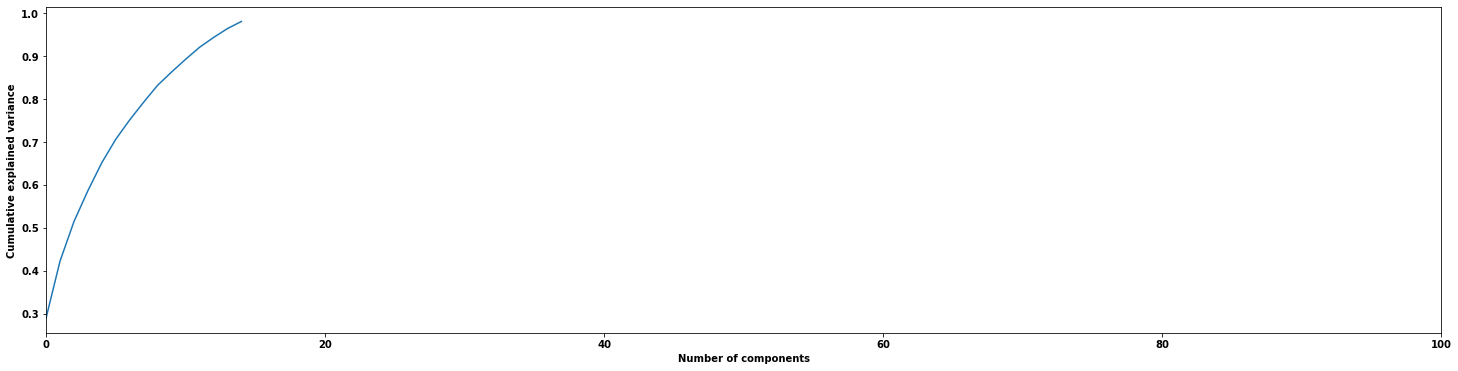

In [135]:

plt.figure(figsize=(25,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,100,1)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

In [151]:
from sklearn.decomposition import PCA   
pca= PCA(14)
pca.fit(X_train_pca)
X_train_pca = pca.transform(X_train_pca)
X_test_pca = pca.transform(X_test_pca)


In [152]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score



seed =7
models = []

models.append(('LR', LinearRegression()))
models.append(('Dec Tree', DecisionTreeRegressor()))
models.append(('Ridge', Ridge()))
models.append(('Lasso', Lasso()))
models.append(('GB', GradientBoostingRegressor(random_state=1, n_estimators=10)))
models.append(('RF', RandomForestRegressor(random_state=1, n_estimators=10) ))

results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='r2')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.811646 (0.021570)
Dec Tree: 0.916504 (0.009037)
Ridge: 0.811554 (0.021581)
Lasso: 0.770579 (0.029005)
GB: 0.756681 (0.009015)
RF: 0.951893 (0.010002)


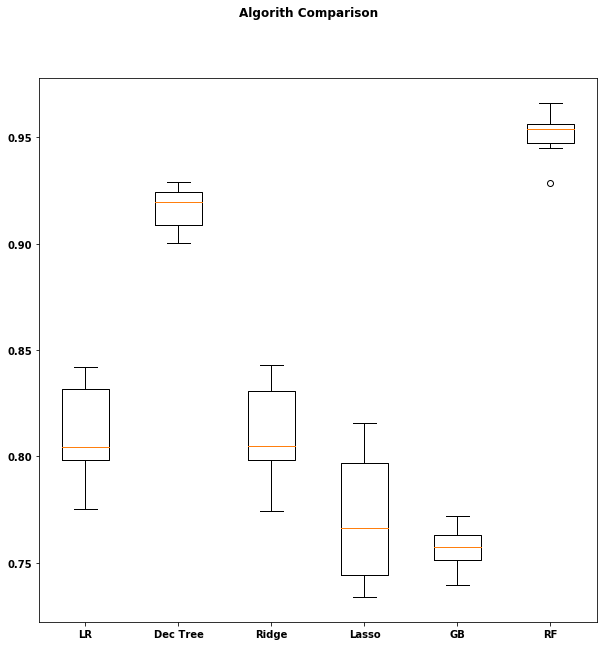

In [153]:
fig = plt.figure(figsize = (10,10))
fig.suptitle('Algorith Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [154]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


seed =7
models = []

models.append(('LR', LinearRegression()))
models.append(('Dec Tree', DecisionTreeRegressor()))
models.append(('Ridge', Ridge()))
models.append(('Lasso', Lasso()))
models.append(('GB', GradientBoostingRegressor(random_state=1, n_estimators=10)))
models.append(('RF', RandomForestRegressor(random_state=1, n_estimators=10) ))

results = []
names = []
test_results = []

for name, model in models:
    
    metrics = {}
    
    kfold = KFold(n_splits=10, random_state=seed)
    
    
    
    cv_results = cross_val_score(model, X_train_pca, y_train, cv=kfold, scoring='r2')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    
    print("==== after prediction metrics of {}==================".format(name))

    

LR: 0.746665 (0.032086)
==== after prediction metrics of LR==================
Dec Tree: 0.798576 (0.034594)
==== after prediction metrics of Dec Tree==================
Ridge: 0.746665 (0.032086)
==== after prediction metrics of Ridge==================
Lasso: 0.744537 (0.032086)
==== after prediction metrics of Lasso==================
GB: 0.625813 (0.039697)
==== after prediction metrics of GB==================
RF: 0.883141 (0.041494)
==== after prediction metrics of RF==================


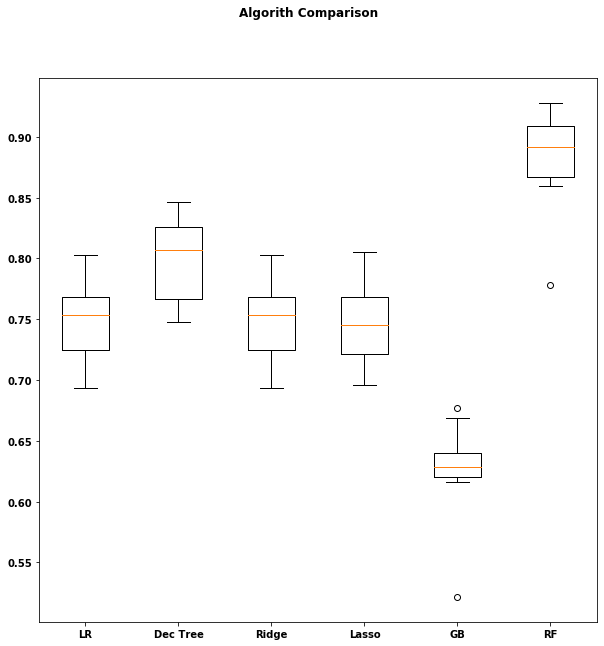

In [155]:
fig = plt.figure(figsize = (10,10))
fig.suptitle('Algorith Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [110]:

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

def print_score(y_test, y_pred):
    print(" mean_absolute_error  =    {} ".format(round(mean_absolute_error(y_test, y_pred), ndigits= 3)))
    print(" mean_squared_error   =    {} ".format(round(mean_squared_error(y_test, y_pred), ndigits= 3)))
    print(" root_mean_squared_error = {} ".format(round(sqrt(mean_squared_error(y_test, y_pred)), ndigits= 3)))
    print(" r2_score =                {} ".format(round(r2_score(y_test, y_pred), ndigits= 3)))

In [112]:
model = RandomForestRegressor(random_state=1, n_estimators=10)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print_score(y_test, y_pred)

 mean_absolute_error  =    1.158 
 mean_squared_error   =    3.079 
 root_mean_squared_error = 1.755 
 r2_score =                0.964 


In [113]:
model = RandomForestRegressor(random_state=1, n_estimators=10)
model.fit(X_train_pca, y_train)
y_pred = model.predict(X_test_pca)
print_score(y_test, y_pred)

 mean_absolute_error  =    2.024 
 mean_squared_error   =    8.869 
 root_mean_squared_error = 2.978 
 r2_score =                0.898 


array([[-0.11655742, -0.31847933, -0.25751384, ..., -0.03879636,
        -0.46310937,  0.46310937],
       [-1.41779229, -0.11053505, -0.25751384, ..., -0.31547383,
        -0.46310937,  0.46310937],
       [ 0.75093249, -0.18251576, -0.25751384, ...,  0.26862305,
        -0.46310937,  0.46310937],
       ...,
       [-0.11655742,  0.80122062, -0.1054732 , ..., -1.1147643 ,
        -0.46310937,  0.46310937],
       [-0.98404733, -0.75036359, -0.23962671, ...,  1.03717157,
         2.15931716, -2.15931716],
       [-0.55030238, -1.05428215, -0.19490887, ..., -2.03702253,
        -0.46310937,  0.46310937]])

In [119]:
num_list.remove("life expectancy")